/var/folders/g7/lp97pw1978j4v7ycn2120pwr0000gn/T/ipykernel_73392/1583082826.py:26: RuntimeWarning: invalid value encountered in arccos
  r = np.arccos(3/2 * q/p * np.sqrt(-3/p))/3


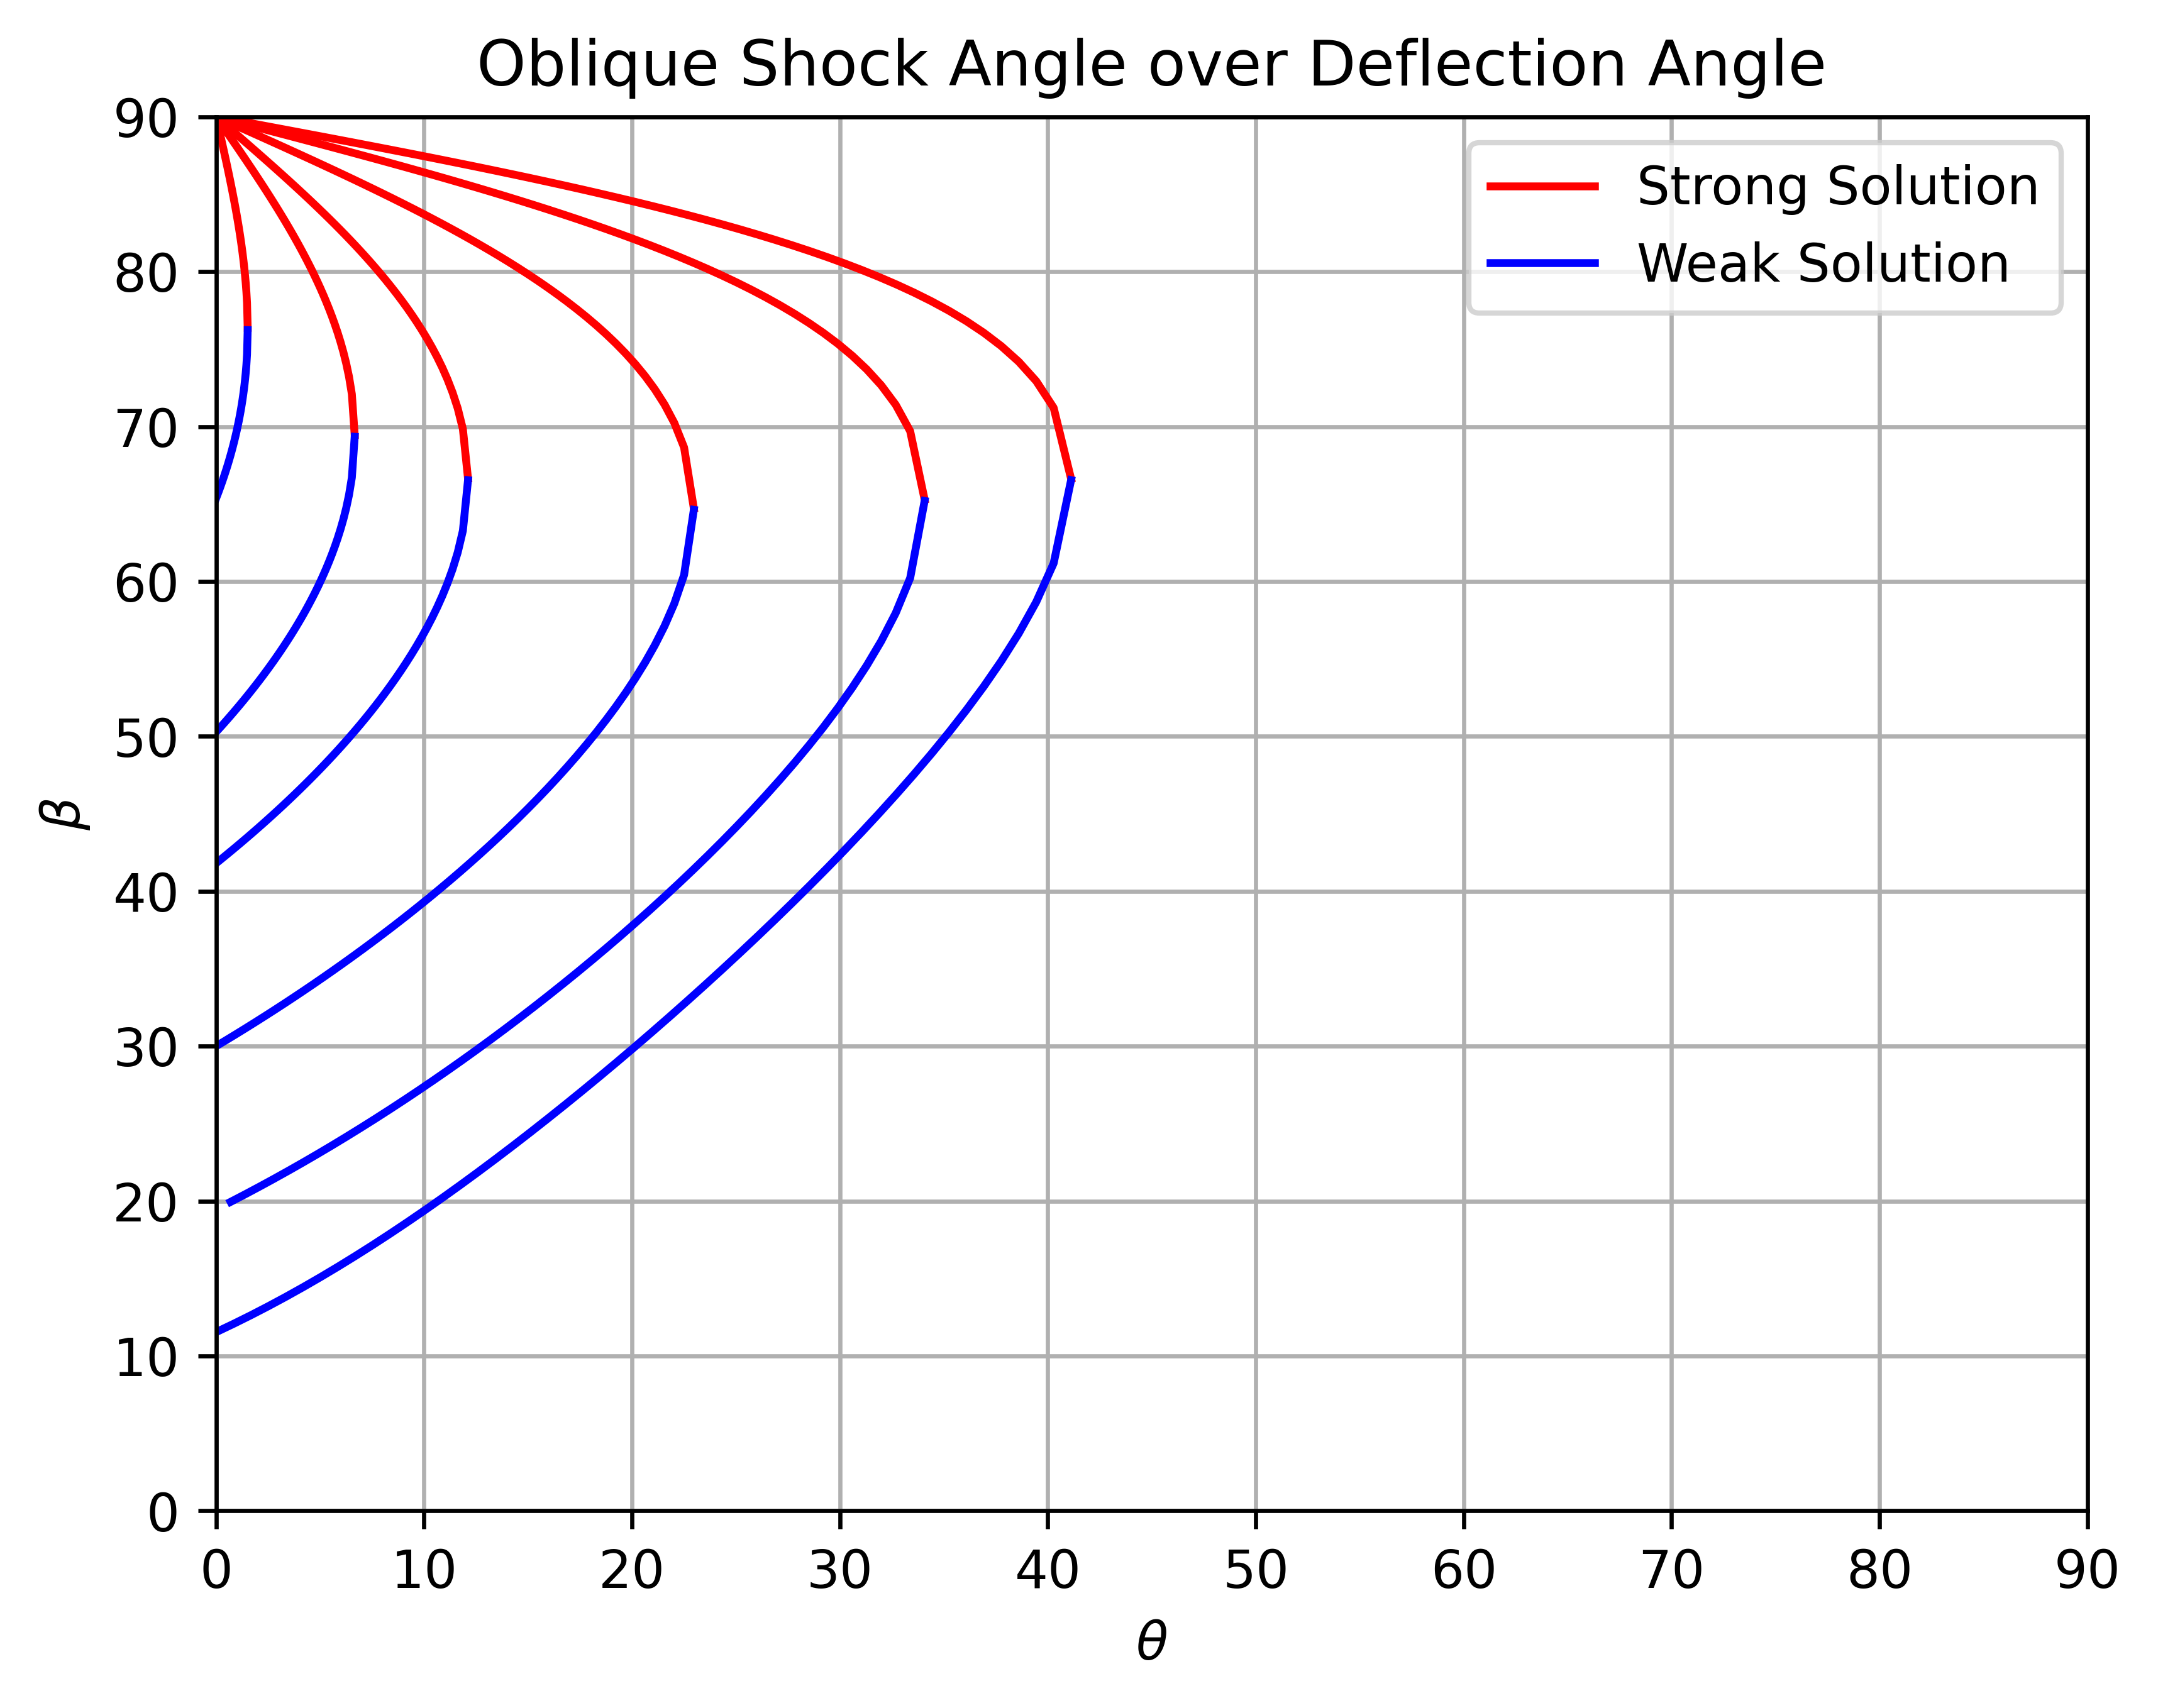

In [ ]:
"""
This short snippet explicitely calculates the oblique shock angle (beta) given the deflection angle (delta), the pre-shock Mach Number (M1), and the ratio of specific heats (gamma)
"""

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 600

g = 1.4

def theta_max(M1, g):
    # method per https://math.stackexchange.com/a/4699525/982890
    
    a = (M1**2 * (1+g) - 4)/(2*g*M1**2)
    b = (M1**2 * (1+g) + 2)/(2*g*M1**4)
    c = a + np.sqrt(a**2 + 4*b)

    theta_max = np.arctan(np.sqrt(2/c - 1) * (c*M1**2 - 2)/((1+g-c)*M1**2 + 2))
    return theta_max

def beta(theta, M1, g):
    # method per https://math.stackexchange.com/a/5115791/982890
    a = -((M1**2 + 2)/M1**2 + g*np.sin(theta)**2)
    b = (2*M1**2 + 1)/M1**4 + (((g+1)**2)/4 + (g-1)/M1**2)*np.sin(theta)**2
    c = - (np.cos(theta)**2)/M1**4

    p = (3*b - a**2)/3
    q = (2*a**3 - 9*a*b + 27*c)/27

    r = np.arccos(3/2 * q/p * np.sqrt(-3/p))/3
    
    strong = np.arcsin(np.sqrt(-a/3 + 2*np.sqrt(-p/3) * np.cos(r - 0*2*np.pi/3)))
    weak = np.arcsin(np.sqrt(-a/3 + 2*np.sqrt(-p/3) * np.cos(r - 1*2*np.pi/3)))

    return strong, weak

for M1 in [1.1, 1.3, 1.5, 2.0, 3.0, 5.0]:
    theta = np.linspace(0, theta_max(M1, g) - 1/1e6) # singularity at theta_max
    strong, weak = beta(theta, M1, g)
    plt.plot(np.rad2deg(theta), np.rad2deg(strong), color = 'red', label = 'Strong Solution' if M1 == 1.1 else None)
    plt.plot(np.rad2deg(theta), np.rad2deg(weak), color = 'blue', label = 'Weak Solution' if M1 == 1.1 else None)

plt.gca().set(xlim = (0, 90), xlabel = r'$\theta$', ylim = (0, 90), ylabel = r'$\beta$', title = 'Oblique Shock Angle over Deflection Angle')
plt.legend(); plt.grid()
plt.show()